In [1]:
from collections import Counter

from graph_tool.all import *
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def cprint(obj):
    import json
    
    print(json.dumps(obj, indent=4, ensure_ascii=False))

In [3]:
g = load_graph_from_csv('sx-mathoverflow.txt.gz',
                        directed=True,
                        eprop_names=['timestamp'],
                        csv_options={'delimiter': " "})

In [4]:
def compute_statistics(l):
    
    if isinstance(l, VertexPropertyMap):
        l = l.a.tolist()
    
    return {
        "max": np.max(l).astype(np.float64),
        "min": np.min(l).astype(np.float64),
        "mean": np.mean(l).astype(np.float64),
        "median": np.median(l).astype(np.float64),
        "std": np.std(l).astype(np.float64)
    }

In [5]:
def plot_eccdf(values, metric_name):
    
    if isinstance(values, VertexPropertyMap):
        values = values.a.tolist()
    
    counter = dict(Counter(values))
    ccdf = []
    ccdf_idxs = []
    total = sum(counter.values())

    for k in sorted(counter):
        ccdf.append(
            sum({key: value for key, value 
                 in counter.items() if key >= k}.values()) / total
        ) 

        ccdf_idxs.append(k)

    plt.figure(figsize=(20, 7))
    plt.grid(True)
    plt.title('Empirical CCDF for {0} distribution'.format(metric_name), fontsize=22)
    plt.plot(ccdf_idxs, ccdf, 'ro')
    
    plt.yscale('log')
    plt.xscale('log')
    
    plt.xlabel('k', fontsize=20)
    plt.xticks(fontsize=16)
    plt.ylabel('$P[D \geq k]$', fontsize=20)
    plt.yticks(fontsize=16)

    plt.show()

In [6]:
def calculate_metrics(g):
    vertices = g.get_vertices()
    in_degrees = g.get_in_degrees(vertices)
    out_degrees = g.get_out_degrees(vertices)
    
    clus = local_clustering(g)
    pg = pagerank(g)
    bet, _ = betweenness(g)
#     clos = closeness(g) 
    
    conn_comps, comp_size_hist = label_components(g)
    
    metrics = [in_degrees, out_degrees, clus, pg, bet, comp_size_hist]
    metric_names = ["in degrees", "out degrees", "local clustering",
                    "pagerank", "betweenness", "size of connected components"]

    return metrics, metric_names
#     return [pg], ["pagerank"]

## MathOverflow interactions

In [7]:
metrics, metric_names = calculate_metrics(g)

in degrees
{
    "max": 5378.0,
    "min": 0.0,
    "mean": 20.410589088564752,
    "median": 4.0,
    "std": 100.40513510523023
}


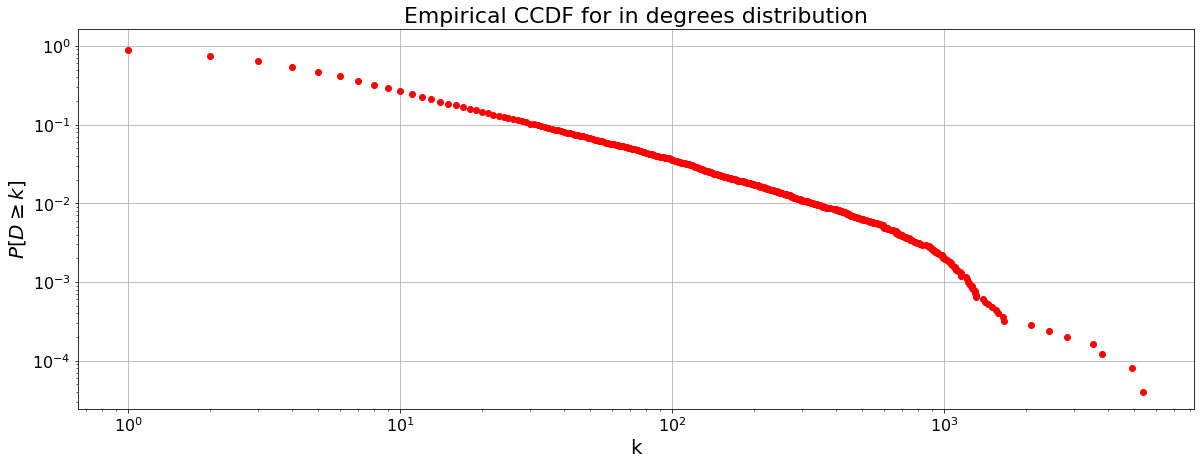

-------
out degrees
{
    "max": 5931.0,
    "min": 0.0,
    "mean": 20.410589088564752,
    "median": 2.0,
    "std": 138.26133077533441
}


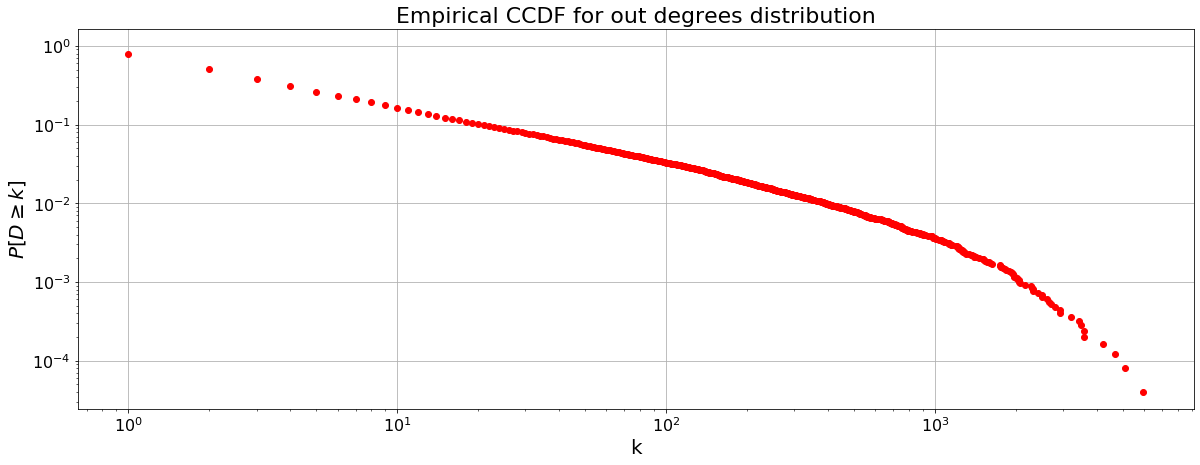

-------
local clustering
{
    "max": 325.0,
    "min": 0.0,
    "mean": 1.920084973917803,
    "median": 0.5,
    "std": 5.8116591342990205
}


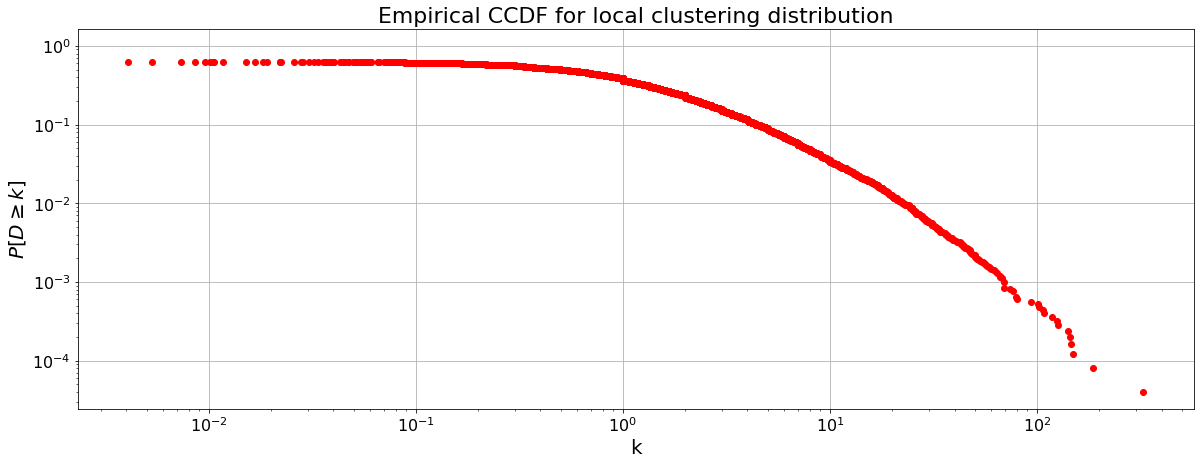

-------
pagerank
{
    "max": 0.0055236850683841,
    "min": 8.013737336608346e-06,
    "mean": 4.0293335482311224e-05,
    "median": 1.5188985500938548e-05,
    "std": 0.0001043780272266462
}


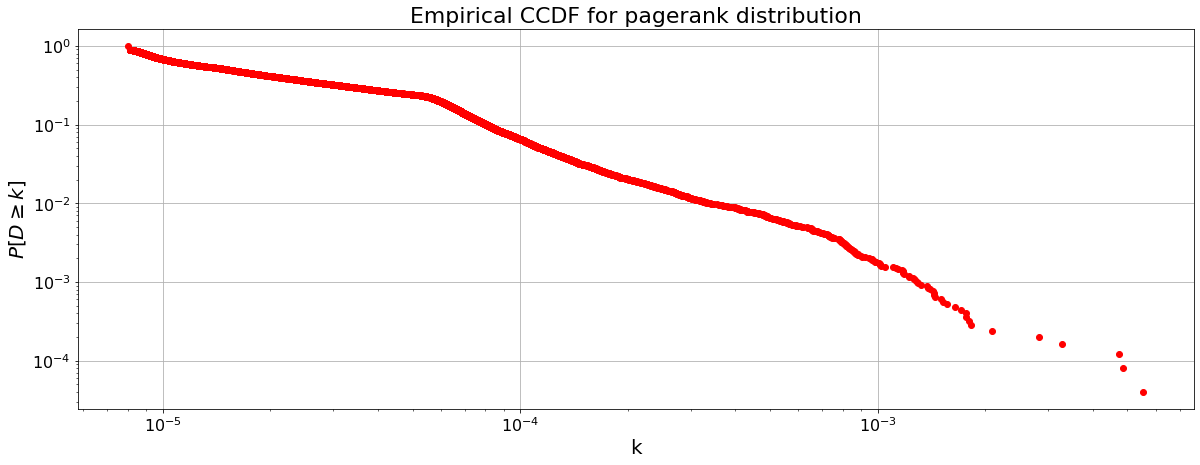

-------
betweenness
{
    "max": 0.044635230957968675,
    "min": 0.0,
    "mean": 5.452782753065877e-05,
    "median": 0.0,
    "std": 0.0006651855083330376
}


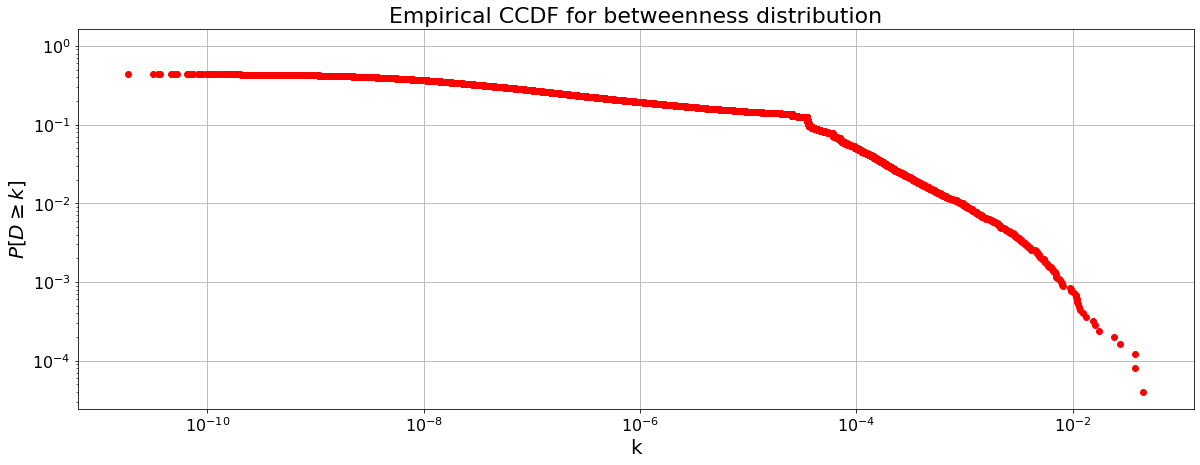

-------
size of connected components
{
    "max": 13095.0,
    "min": 1.0,
    "mean": 2.13469809048684,
    "median": 1.0,
    "std": 121.43345519741551
}


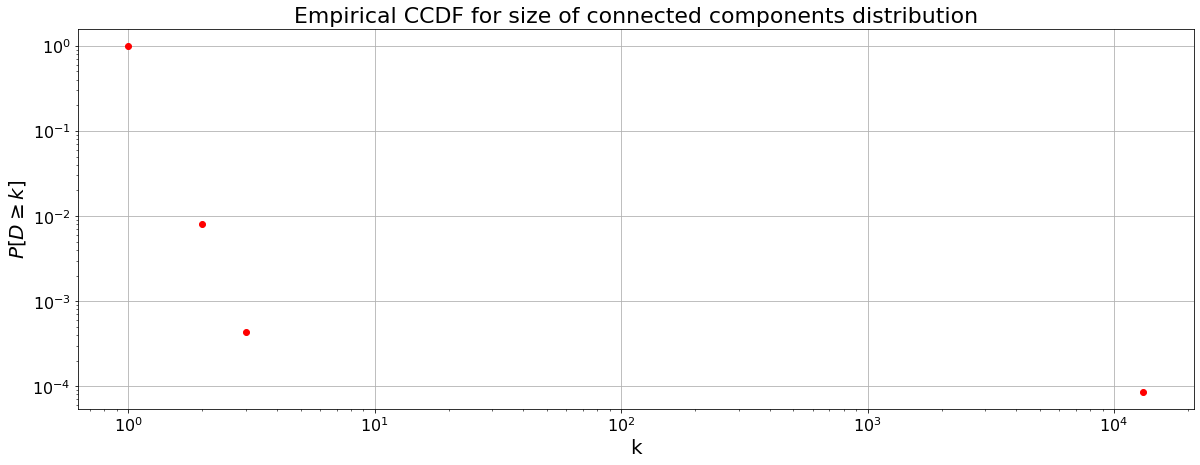

-------


In [8]:
for metric, metric_name in zip(metrics, metric_names):
    print(metric_name)
    cprint(compute_statistics(metric))
    plot_eccdf(metric, metric_name)
    print('-------')

## Wiki-Vote

In [27]:
wikivote = load_graph_from_csv('wiki-Vote.txt',
                               directed=True,
                               csv_options={'delimiter': "\t"})

In [30]:
metrics, metric_names = calculate_metrics(wikivote)

in degrees
{
    "max": 457.0,
    "min": 0.0,
    "mean": 14.573295853829936,
    "median": 0.0,
    "std": 31.72872658686329
}


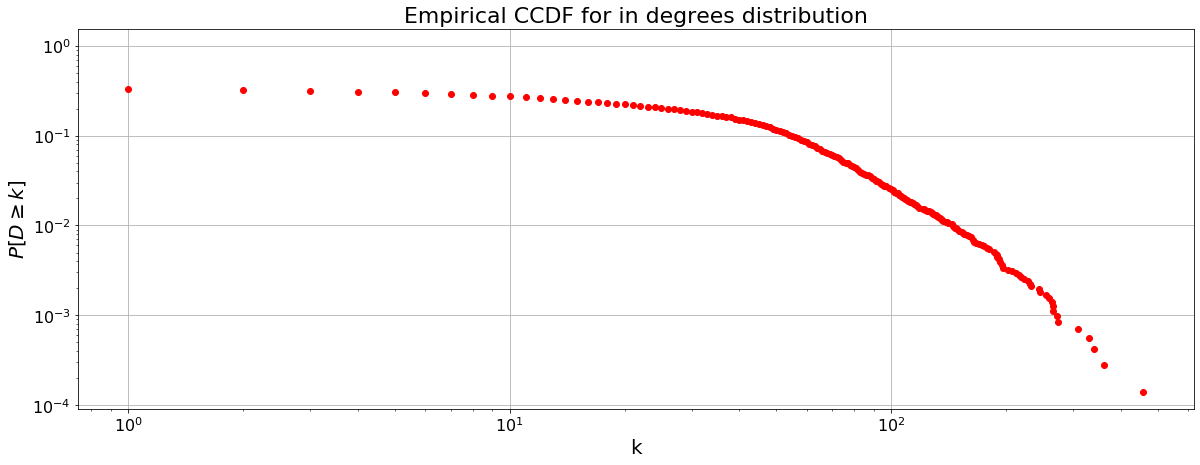

-------
out degrees
{
    "max": 893.0,
    "min": 0.0,
    "mean": 14.573295853829936,
    "median": 2.0,
    "std": 42.279115598262216
}


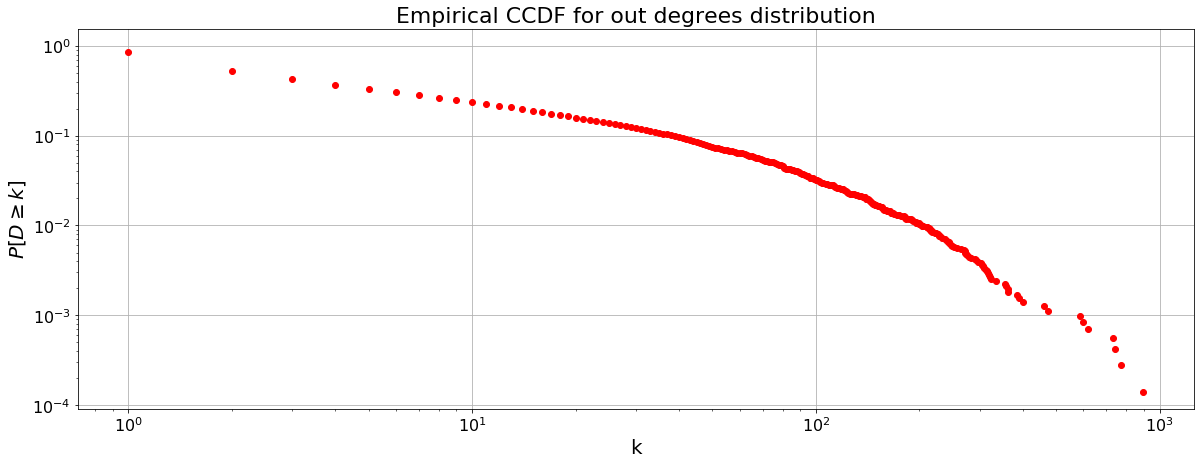

-------
local clustering
{
    "max": 2.0,
    "min": 0.0,
    "mean": 0.16068528995036926,
    "median": 0.10714285714285714,
    "std": 0.24826458047284458
}


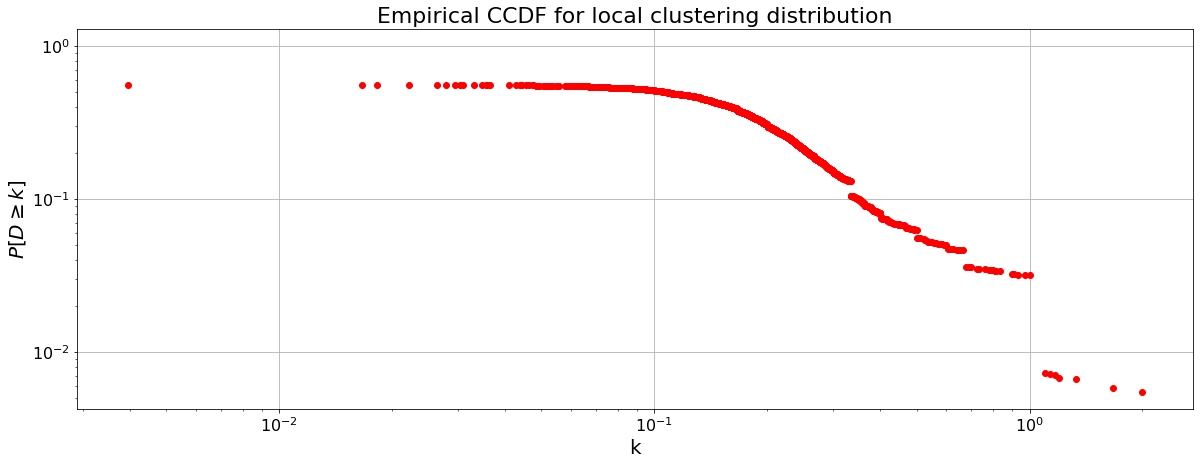

-------
pagerank
{
    "max": 0.004607173852259854,
    "min": 5.048837433139949e-05,
    "mean": 0.000140548137737175,
    "median": 5.048837433139949e-05,
    "std": 0.000233309274154724
}


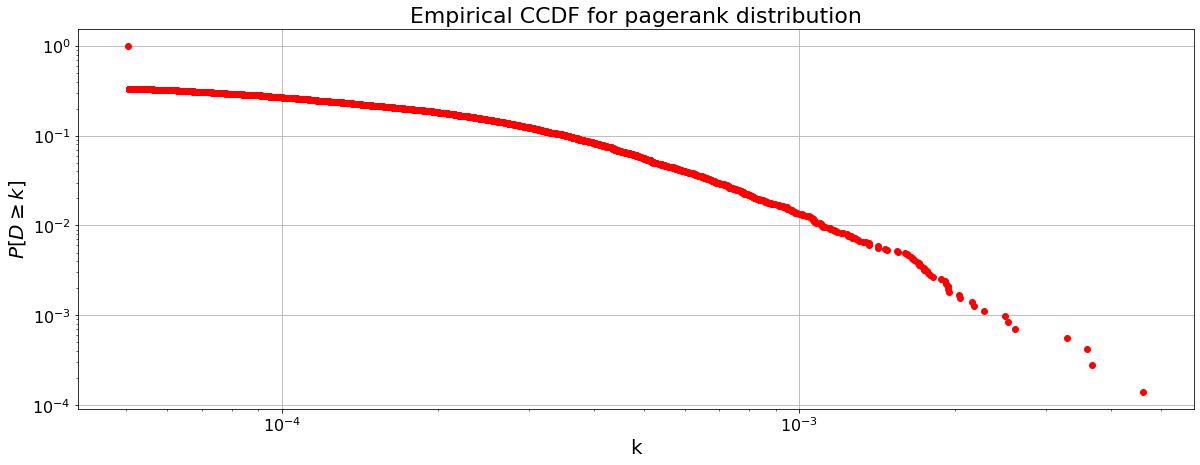

-------
betweenness
{
    "max": 0.017654409558147843,
    "min": 0.0,
    "mean": 7.767448080601854e-05,
    "median": 0.0,
    "std": 0.0004608855527603889
}


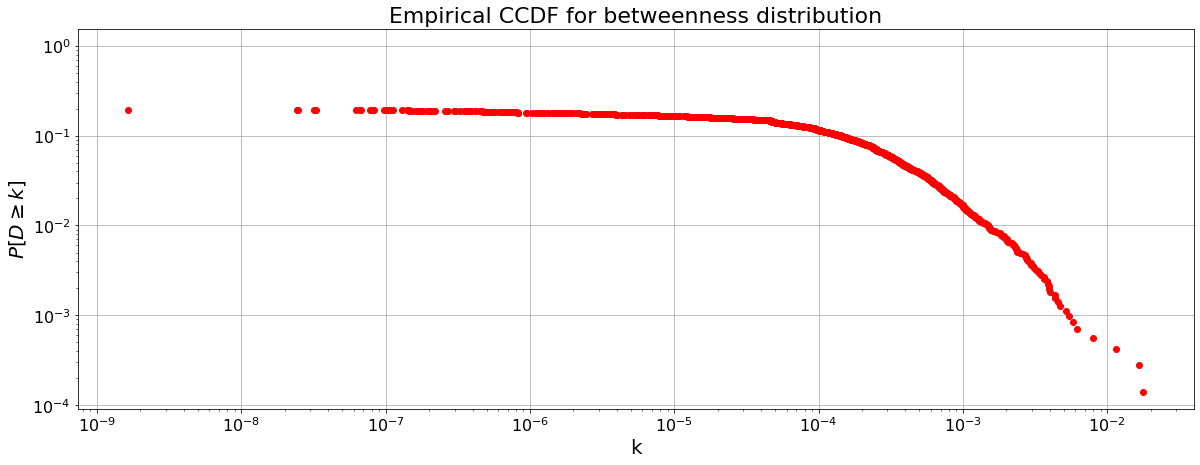

-------
size of connected components
{
    "max": 1300.0,
    "min": 1.0,
    "mean": 1.2233493810178817,
    "median": 1.0,
    "std": 17.0317632967414
}


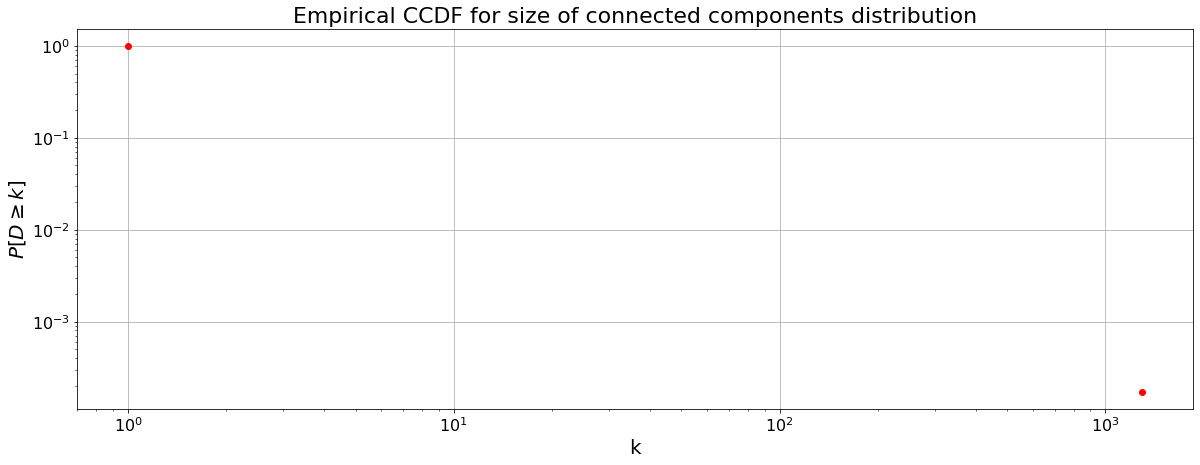

-------


In [31]:
for metric, metric_name in zip(metrics, metric_names):
    print(metric_name)
    cprint(compute_statistics(metric))
    plot_eccdf(metric, metric_name)
    print('-------')

## High-Energy Physics Citations

In [38]:
high_energy = load_graph_from_csv('Cit-HepPh.txt',
                                  directed=True,
                                  csv_options={'delimiter': "\t"})

In [41]:
metrics, metric_names = calculate_metrics(high_energy)

in degrees
{
    "max": 846.0,
    "min": 0.0,
    "mean": 12.203380999247381,
    "median": 4.0,
    "std": 25.331885527799574
}


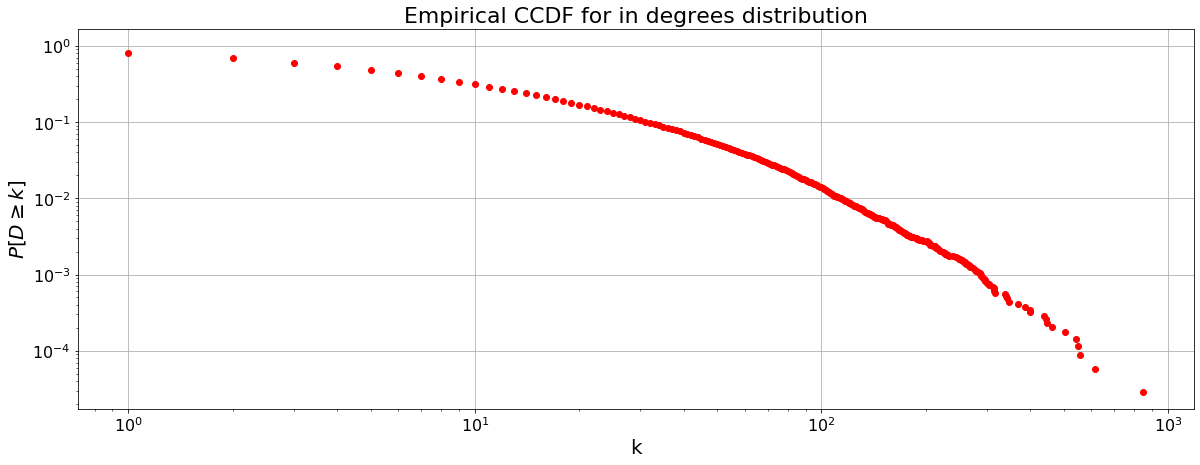

-------
out degrees
{
    "max": 411.0,
    "min": 0.0,
    "mean": 12.203380999247381,
    "median": 8.0,
    "std": 15.224253402206127
}


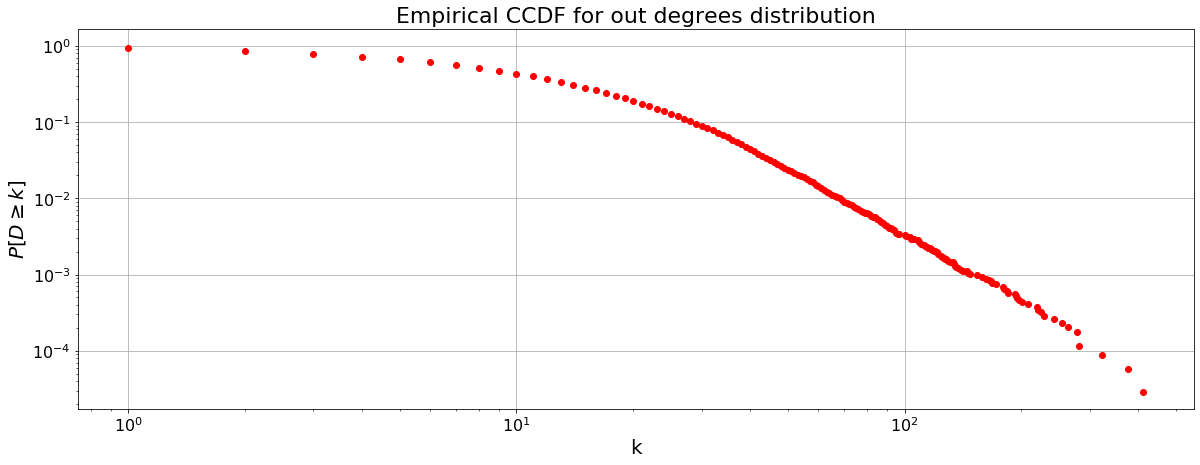

-------
local clustering
{
    "max": 2.0,
    "min": 0.0,
    "mean": 0.2855894612836594,
    "median": 0.24666666666666667,
    "std": 0.20820421525493482
}


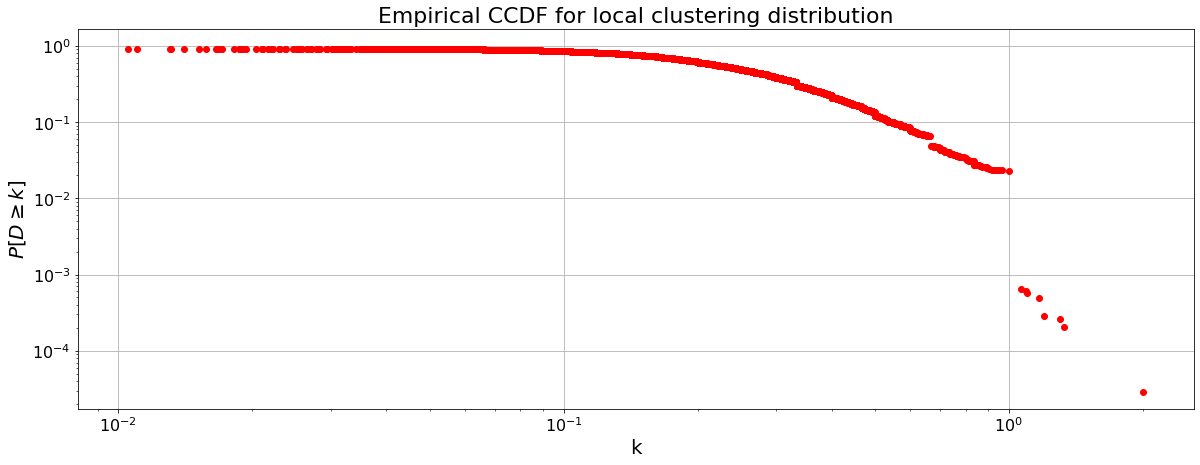

-------
pagerank
{
    "max": 0.0035150117301193684,
    "min": 9.31970869033948e-06,
    "mean": 2.89469113645574e-05,
    "median": 1.30596473665694e-05,
    "std": 7.290416903662178e-05
}


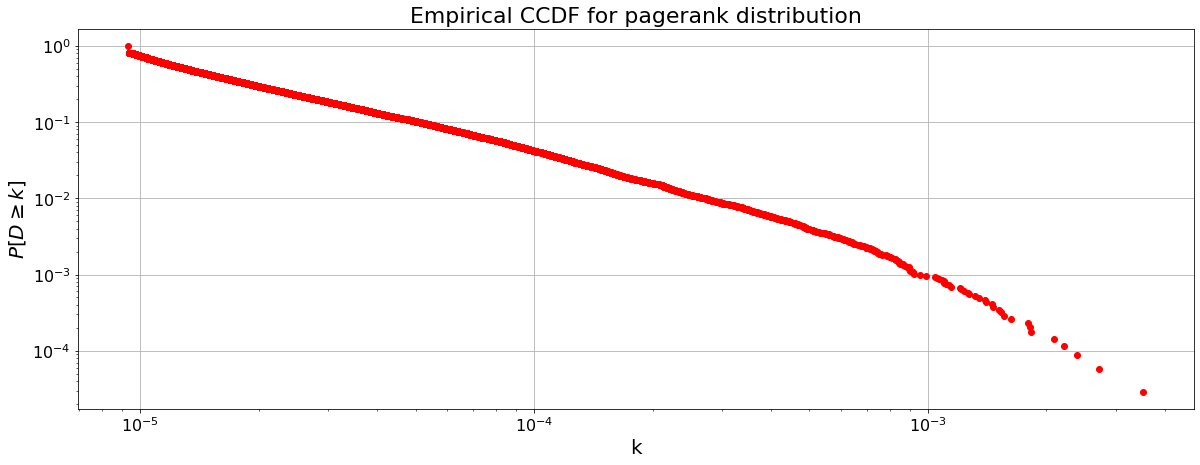

-------
betweenness
{
    "max": 0.16600972258740657,
    "min": 0.0,
    "mean": 0.00012596866727121513,
    "median": 2.490976171194776e-06,
    "std": 0.0017653032553072202
}


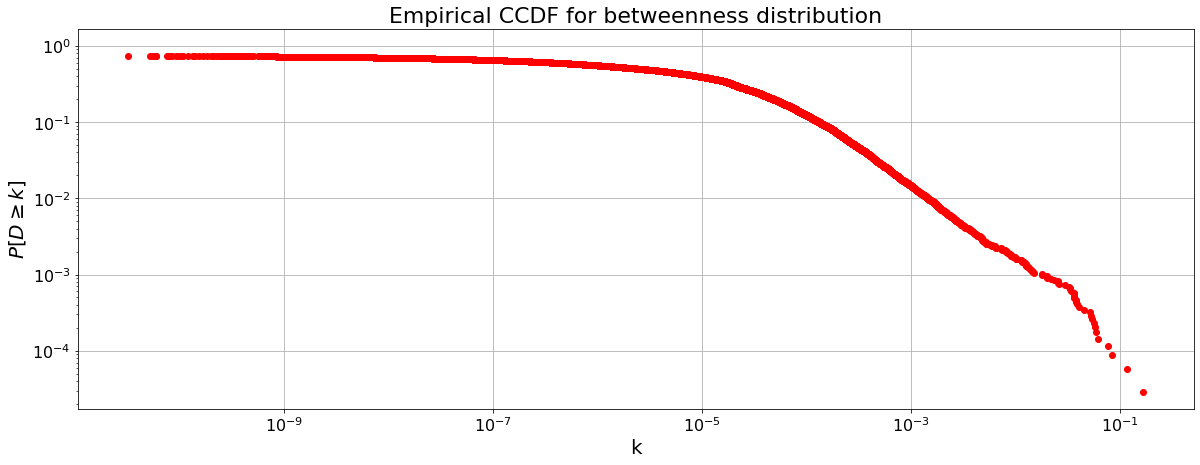

-------
size of connected components
{
    "max": 12711.0,
    "min": 1.0,
    "mean": 1.5987597186227323,
    "median": 1.0,
    "std": 86.46267844199363
}


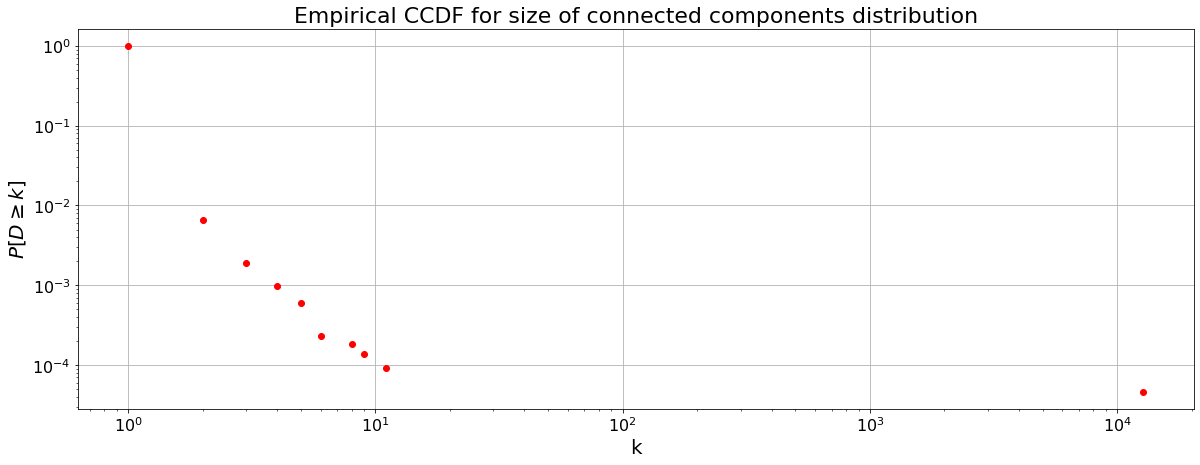

-------


In [42]:
for metric, metric_name in zip(metrics, metric_names):
    print(metric_name)
    cprint(compute_statistics(metric))
    plot_eccdf(metric, metric_name)
    print('-------')

## Ask Ubuntu

In [8]:
ubuntu = load_graph_from_csv('sx-askubuntu.txt.gz',
                             directed=True,
                             eprop_names=['timestamp'],
                             csv_options={'delimiter': " "})

In [11]:
metrics, metric_names = calculate_metrics(ubuntu)

in degrees
{
    "max": 4926.0,
    "min": 0.0,
    "mean": 6.053610434607949,
    "median": 2.0,
    "std": 43.70886631806873
}


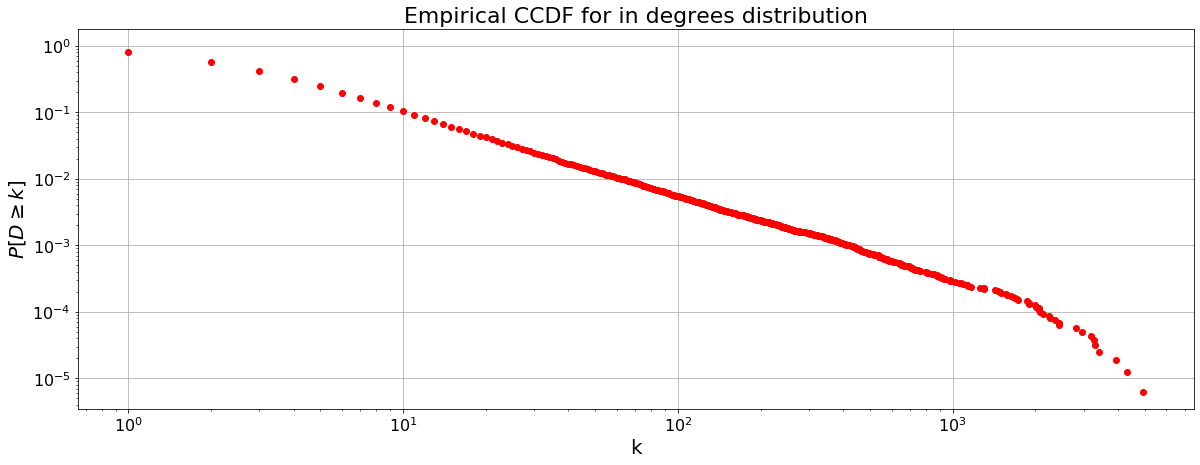

-------
out degrees
{
    "max": 8729.0,
    "min": 0.0,
    "mean": 6.053610434607949,
    "median": 1.0,
    "std": 77.89851689475583
}


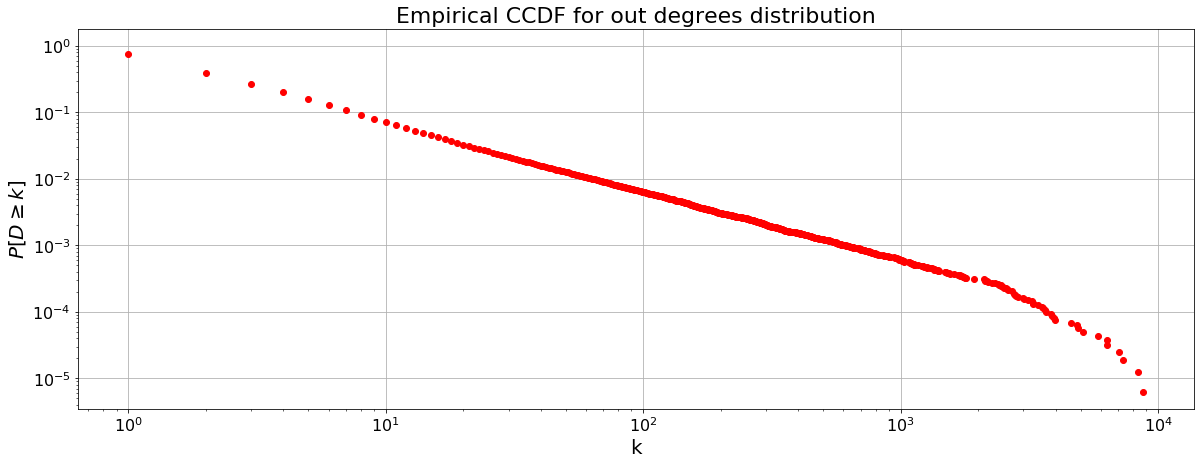

-------
local clustering
{
    "max": 215.0,
    "min": 0.0,
    "mean": 0.4720798099032565,
    "median": 0.0,
    "std": 2.7042958015674956
}


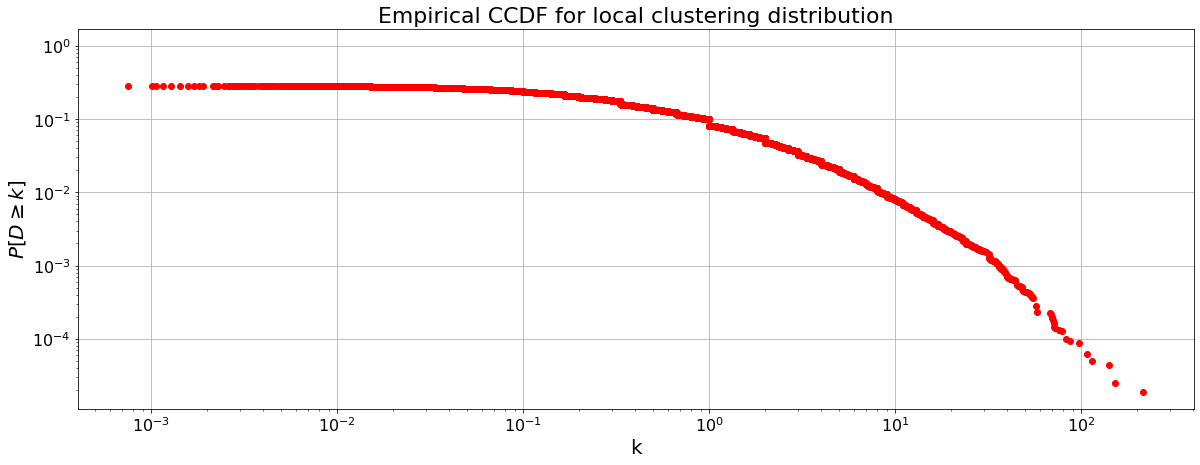

-------
pagerank
{
    "max": 0.0029168874315758106,
    "min": 1.4374267873317522e-06,
    "mean": 6.276833463054557e-06,
    "median": 2.448499248626157e-06,
    "std": 2.1265014438467776e-05
}


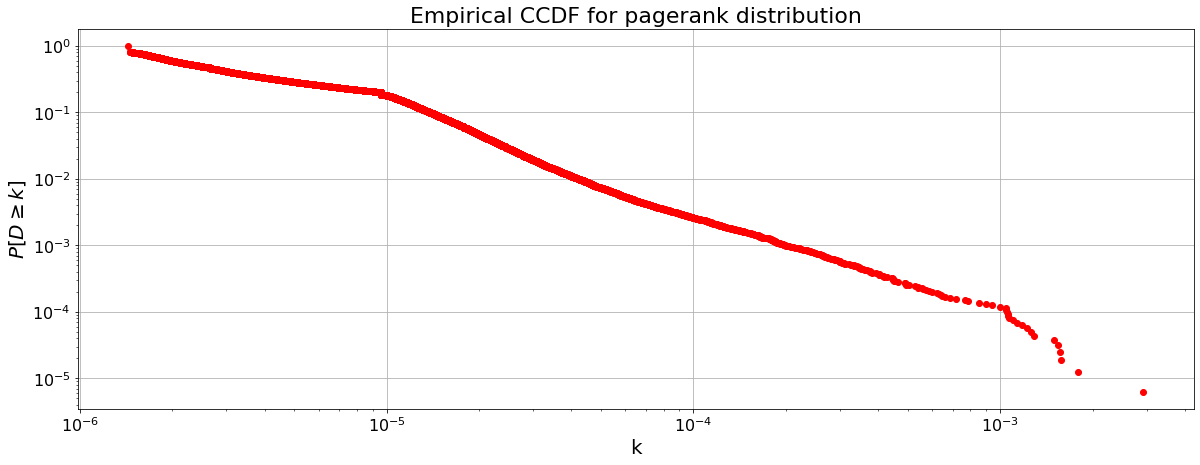

-------
betweenness
{
    "max": 0.03898184665164951,
    "min": 0.0,
    "mean": 7.998152201223447e-06,
    "median": 0.0,
    "std": 0.0002132453644791368
}


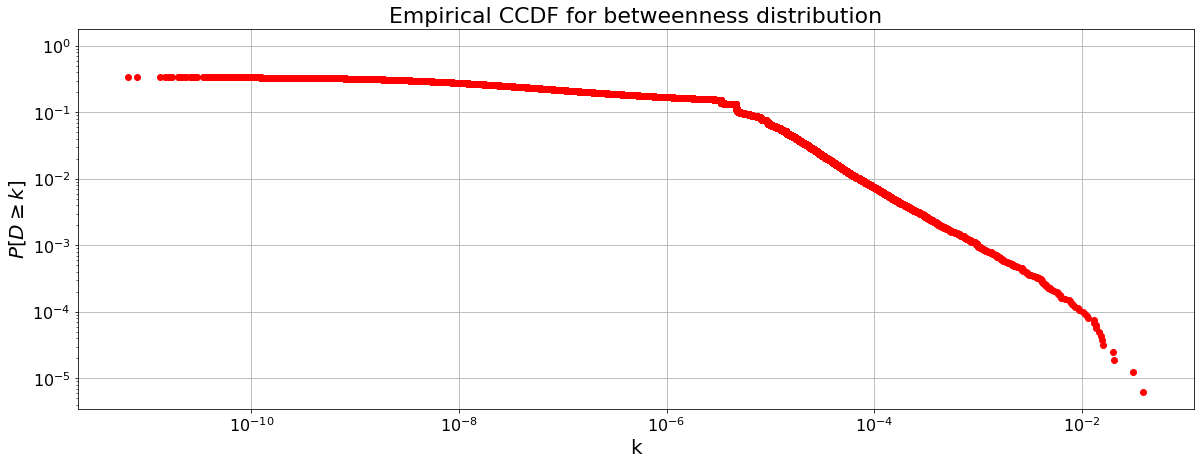

-------
size of connected components
{
    "max": 59813.0,
    "min": 1.0,
    "mean": 1.639492045197275,
    "median": 1.0,
    "std": 191.87175197140027
}


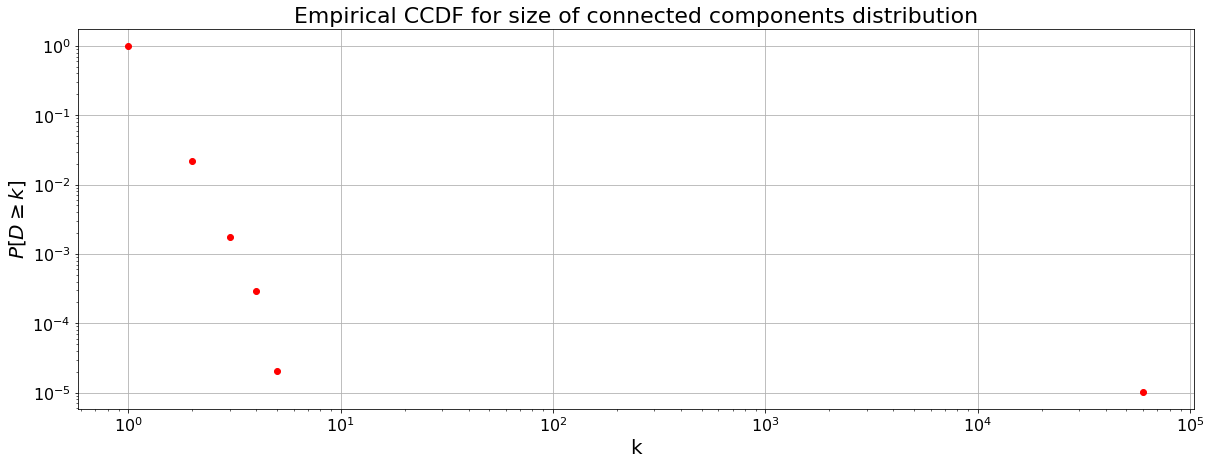

-------


In [12]:
for metric, metric_name in zip(metrics, metric_names):
    print(metric_name)
    cprint(compute_statistics(metric))
    plot_eccdf(metric, metric_name)
    print('-------')